In [1]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
from numpy import clip, unique
import matplotlib.pyplot as plt

# read the image and print its dimensions
image = imread('ara_ararauna.jpg')
image.shape

(600, 800, 3)

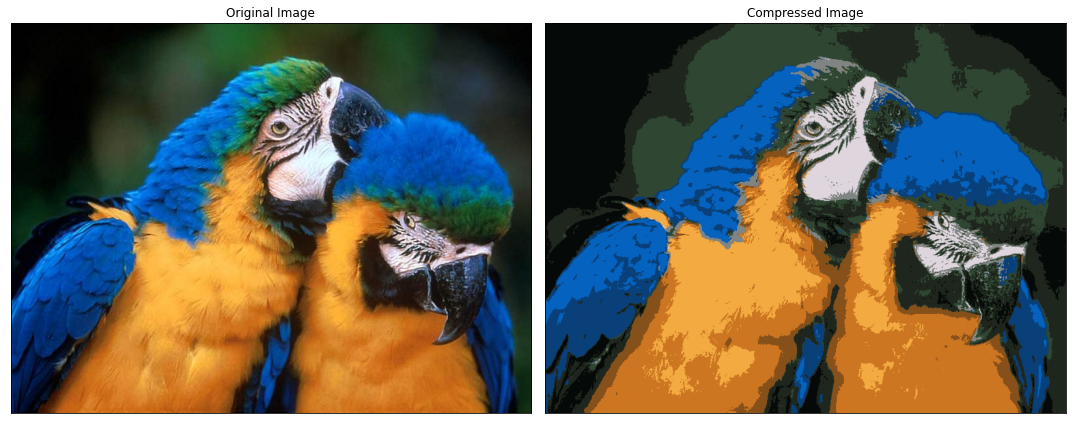

Unique Colors in Original Image: 125712
Unique Colors in Compressed Image: 10


In [2]:
def compress_photo(image, k):
    img_size = image.shape
    
    # reshape image to be 2-dimension
    X = image.reshape(img_size[0] * img_size[1], img_size[2])
    
    # perform k-means algorithm
    km = KMeans(n_clusters=k)
    km.fit(X)
    
    # use the centroids to compress the image
    X_compressed = km.cluster_centers_[km.labels_]
    X_compressed = clip(a=X_compressed.astype('uint8'), a_min=0, a_max=255)
    
    # reshape X_compressed to have the same dimensions as the original image 600 * 800 * 3
    X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])
    
    # plot the original and the compressed image next to each other
    fig = plt.figure(figsize=(15, 8))

    # left subplot
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.title('Original Image')

    # right subplot
    plt.subplot(1, 2, 2)
    plt.imshow(X_compressed)
    plt.xticks([]), plt.yticks([])
    plt.title('Compressed Image')
    plt.tight_layout()
    plt.show()
    
    # get unique colors (pixels) and count unique pixels
    print_list = ['Unique Colors in Original Image:', 'Unique Colors in Compressed Image:']
    
    for im, val in zip([image, X_compressed], print_list):
        colors, counts = unique(im.reshape(-1, 3), axis=0, return_counts=True)
        print(val, colors.shape[0])
        

compress_photo(image=image, k=10)